In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import mediapy as media
import numpy as np
import os
import seaborn as sns

from point_labeler import PointLabeler
from point_tracker import PointTracker
from tapnet.utils import transforms
from tapnet.utils import viz_utils
from video_manager import VideoManager

In [2]:
video_folder = "/home/daphne/Documents/GMA/data/Preprocessed_Videos"
video_manager = VideoManager()

In [3]:
video_manager.add_all_videos(video_folder, add_pt_data=True)  # Load class data, not the videos themselves

In [4]:
print(video_manager.get_all_video_ids())

['07', '35', '28', '11', '49', '21', '23', '47', '45', '44', '40', '17', '06', '31', '04', '37', '34', '26', '09', '30', '18', '10', '38']


## Label points

In [5]:
video_id = '07'

In [6]:
video_object = video_manager.get_video_object(video_id)

In [7]:
video_object.patient_data.age_group

'older'

In [8]:
# Load video
video_object.load_video()

In [12]:
%matplotlib notebook
# Label video
frame_index = 0
video_object.label_and_store_keypoints(frame_index)inline

<IPython.core.display.Javascript object>

In [13]:
video_object.keypoint_labels

{0: {}}

In [14]:
keypoints = {0: {'head top': np.array([444, 985]), 'left elbow': np.array([ 734, 1183]), 'right elbow': np.array([ 324, 1317]), 'left wrist': np.array([ 713, 1077]), 'right wrist': np.array([ 271, 1225]), 'left knee': np.array([ 783, 1600]), 'right knee': np.array([ 585, 1684]), 'left ankle': np.array([ 865, 1695]), 'right ankle': np.array([ 617, 1815])}}

In [18]:
import csv
filename = 'output/test.csv'
with open(filename, 'w', newline='') as csvfile:
    fieldnames = ['frame', 'keypoint', 'x_coord', 'y_coord']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for frame, points in keypoints.items():
        for keypoint, coords in points.items():
            writer.writerow({
                'frame': frame,
                'keypoint': keypoint,
                'x_coord': coords[0],
                'y_coord': coords[1]
            })

In [ ]:
# Process videos in subfolders and extract metadata
video_manager.add_all_videos(video_folder)

AI_GeMo_early_N
/home/daphne/Documents/GMA/data/Preprocessed_Original_Videos/AI_GeMo_early_N
AI_GeMo_early_PR
/home/daphne/Documents/GMA/data/Preprocessed_Original_Videos/AI_GeMo_early_PR
AI_GeMo_late_FN
/home/daphne/Documents/GMA/data/Preprocessed_Original_Videos/AI_GeMo_late_FN
40_FN_c.mp4
/home/daphne/Documents/GMA/data/Preprocessed_Original_Videos/AI_GeMo_late_FN/40_FN_c.mp4


In [5]:
# Now, iterate over the videos in the manager and process each one
for video_id in video_manager.videos:
    video_data = video_manager.get_video_data(video_id)
    video_metadata = video_manager.get_video_metadata(video_id)
    if video_data:
        video = video_data.video
        print(f'video_id: {video_metadata.video_id} \n', 
              f'file_path: {video_metadata.file_path} \n'
              f'age_group: {video_metadata.age_group} \n'
              f'health_status: {video_metadata.health_status}')
        print(f'video type: {type(video)}')
        print(f'with mediapy metadata: {video.metadata}')
        height, width = video.metadata.shape
        print(f'height: {height} \n'
              f'width: {width} \n'
              f'number_frames: {video.metadata.num_images}')
        print('---------------')

In [5]:
for video_id in video_manager.videos:
    print(video_id)

### Label first frame

In [6]:
task = 'extreme_keypoints'

In [7]:
video_id = '51'
video_data = video_manager.get_video_data(video_id)
point_labeler = PointLabeler(video_data)

In [10]:
video_data

In [9]:
frame_index_first = 0
# Label points at first timeframe
point_labeler.label_points(frame_index_first, task)

<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute 'video'

In [8]:
video_manager.save_point_labels(video_id, frame_index_first, point_labeler.get_labels(frame_index_first))    

<IPython.core.display.Javascript object>

AttributeError: 'NoneType' object has no attribute 'video'

In [15]:
point_label_first = video_manager.get_point_labels(video_id, frame_index_first)
print(f'Video ID: {video_id}, frame_index: {frame_index_first}, point labels: {point_label_first}')

Video ID: 51, frame_index: 0, point labels: {'head top': array([349, 610]), 'left elbow': array([267, 845]), 'right elbow': array([541, 797]), 'left wrist': array([252, 772]), 'right wrist': array([546, 715]), 'left knee': array([ 369, 1117]), 'right knee': array([ 571, 1039]), 'left ankle': array([ 419, 1206]), 'right ankle': array([ 559, 1144])}


# Track points

In [16]:
tracker = PointTracker('../tapnet/checkpoints/tapir_checkpoint_panning.npy')

In [17]:
frames = media.resize_video(video, (256, 256))

In [18]:
frames.shape

(791, 256, 256, 3)

In [19]:
tracks, visibles = tracker.track_selected_points(video, frame_index_first, point_label_first)
video_manager.save_tracking_data(video_id, frame_index_first, tracks, visibles)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [20]:
tracks_first, visibles_first = video_manager.get_tracking_data(video_id, frame_index_first)

In [21]:
tracks_first

array([[[ 350.10935426,  612.15723038],
        [ 350.30279517,  611.72252655],
        [ 349.79714513,  612.69481659],
        ...,
        [ 468.279351  ,  641.05230331],
        [ 467.019732  ,  641.43327713],
        [ 465.63403845,  640.21745682]],

       [[ 268.04101646,  848.69350433],
        [ 267.4158901 ,  847.22906113],
        [ 267.94555128,  847.48020172],
        ...,
        [ 287.05501914,  802.63973236],
        [ 287.1517396 ,  802.87862778],
        [ 287.68426538,  802.81476974]],

       [[ 542.26547956,  800.05411148],
        [ 542.79230833,  800.89982986],
        [ 542.61618376,  801.0020256 ],
        ...,
        [ 560.57046175,  832.73700714],
        [ 560.43669462,  832.21652985],
        [ 561.40589476,  831.94656372]],

       ...,

       [[ 572.47850418, 1040.59387207],
        [ 573.40547562, 1040.81588745],
        [ 573.28529119, 1040.94715118],
        ...,
        [ 586.06668234, 1056.52873993],
        [ 585.78286171, 1053.88057709],
        [

In [22]:
visibles_first

Array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [24]:
video_viz = viz_utils.paint_point_track(video, tracks_first, visibles_first)

In [25]:
fps_value = video.metadata.fps
bps_value = video.metadata.bps
file_path = os.path.join('output', f'test_tracked_points_{task}_video_{video_id}_frame_{frame_index_first}.mp4')
media.write_video(file_path, video_viz, fps=fps_value, bps=bps_value)
print(f'wrote video {video_id} with tracked labels to', file_path)

wrote video 51 with tracked labels to output/test_tracked_points_extreme_keypoints_video_51_frame_0.mp4


# Visualize labelled points

In [43]:
%matplotlib inline

In [27]:
body_keypoints = ['head top', 'left elbow', 'right elbow',
                  'left wrist', 'right wrist',
                  'left knee', 'right knee',
                  'left ankle', 'right ankle']

full_set_body_keypoints = ['nose',
                           'head bottom', 'head top',
                           'left ear', 'right ear',
                           'left shoulder', 'right shoulder',
                           'left elbow', 'right elbow',
                           'left wrist', 'right wrist',
                           'left hip', 'right hip',
                           'left knee', 'right knee',
                           'left ankle', 'right ankle']

In [28]:
def create_bodypart_colormap(body_keypoints):
    # Use a matplotlib colormap
    colormap = sns.color_palette("hls", len(body_keypoints))  # 'tab20' is a good palette for distinct colors

    bodypart_colors = {
        body_keypoints[i]: colormap[i] for i in range(len(body_keypoints))
    }

    return bodypart_colors

colormap = create_bodypart_colormap(full_set_body_keypoints)

In [32]:
def draw_points(points_list, video, index):
    fig = plt.figure(figsize=(20, 10))
    ax_image = fig.add_subplot(121)
    ax_image.imshow(video[index])
                
    for keypoint in body_keypoints:
        point = points_list[keypoint]
        # ax_image.plot(points_list[ii][0],
        #                                    points_list[ii][1],
        #                                    'o', color=color)
        if point is not None:
            color = colormap[keypoint]
            ax_image.plot(point[0], point[1], 'o', color=color)
    plt.draw()

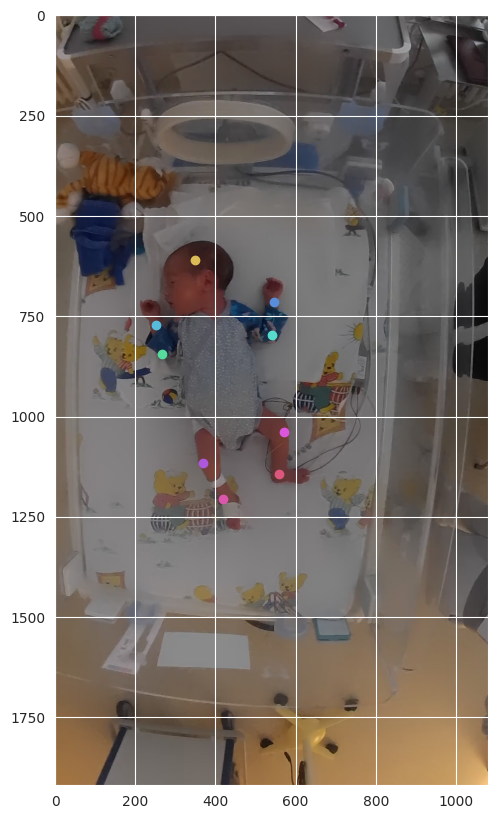

In [42]:
draw_points(point_label_first, video, 0)

In [ ]:
# Visualize tracked points